In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt



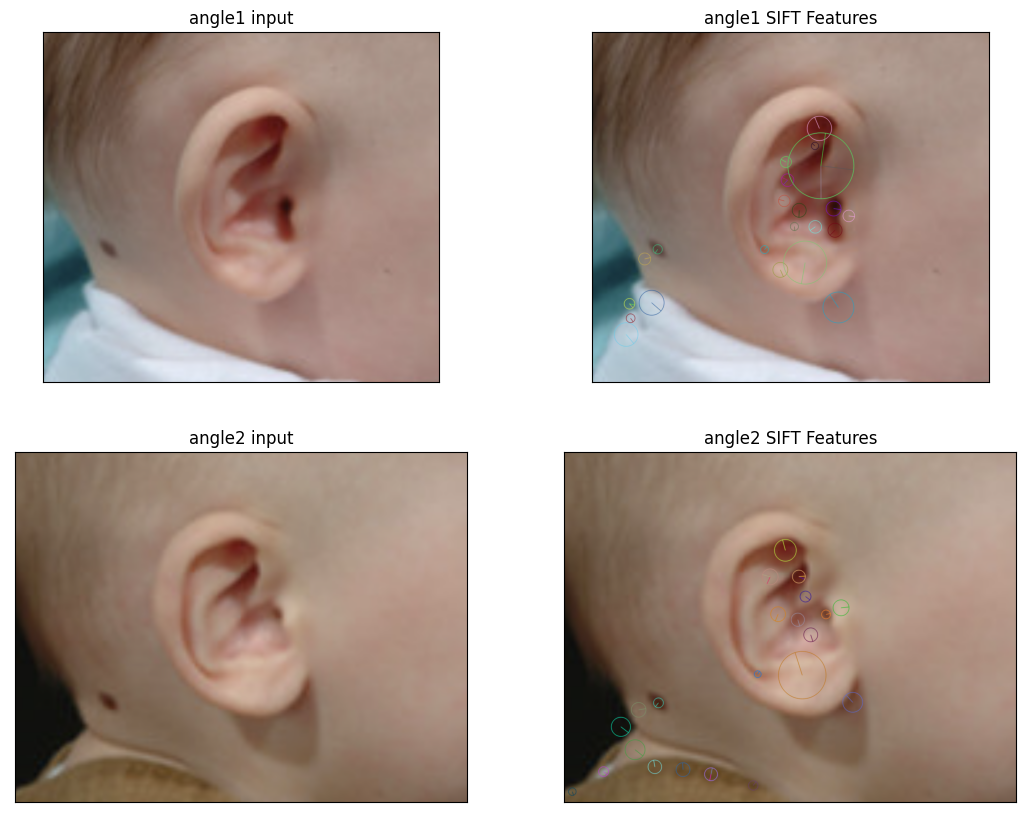

In [11]:
angle1 = cv2.imread('angle1.png') 
angle1 = cv2.cvtColor(angle1, cv2.COLOR_BGR2RGB)

angle2 = cv2.imread('angle2.png') 
angle2 = cv2.cvtColor(angle2, cv2.COLOR_BGR2RGB)
sift = cv2.xfeatures2d.SIFT_create()
angle1_copy = angle1.copy()
angle2_copy = angle2.copy()

keypoints1 = sift.detect(angle1, None)
keypoints1, descriptors1 = sift.compute(angle1, keypoints1)

keypoints2 = sift.detect(angle2, None)
keypoints2, descriptors2 = sift.compute(angle2, keypoints2)

cv2.drawKeypoints(angle1, keypoints1, angle1_copy, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(angle2, keypoints2, angle2_copy, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(13,10))
plt.subplot(221), plt.imshow(angle1)
plt.title("angle1 input"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(angle1_copy)
plt.title("angle1 SIFT Features"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(angle2)
plt.title("angle2 input"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(angle2_copy)
plt.title("angle2 SIFT Features"), plt.xticks([]), plt.yticks([])
plt.show()

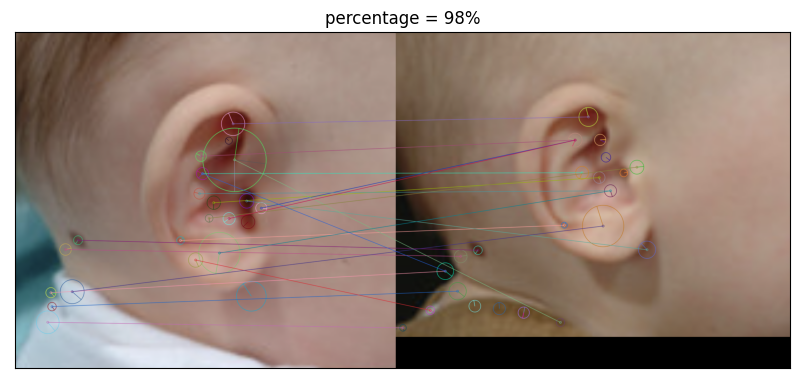

In [18]:
bf = cv2.BFMatcher() 
matches = bf.match(descriptors1, descriptors2) # query image, train image
matches = sorted(matches, key = lambda x:x.distance)

match12 = cv2.drawMatches(angle1_copy,keypoints1,angle2_copy,keypoints2, matches[:20], None, flags=2)

plt.figure(figsize=(10,20))
plt.imshow(match12)
plt.title("percentage = 98%"), plt.xticks([]), plt.yticks([])
plt.show()